We will do a basic EDA of the preprint article in Quantum Physics published between 1994 and 2009.

In [88]:
import pandas as pd 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime as dt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [89]:
df = pd.read_csv('arxiv.csv')
df.tail(5)

,title,abstract,categories,created,id,doi
72876,Local environment can enhance fidelity of quan...,We show how an interaction with the environmen...,['quant-ph'],1999-12-21,quant-ph/9912098,10.1103/PhysRevA.62.012311
72877,Quantum feedback control and classical control...,We introduce and discuss the problem of quantu...,['quant-ph'],1999-12-24,quant-ph/9912107,10.1103/PhysRevA.62.012105
72878,Thermostatistics of q-deformed boson gas,We show that a natural realization of the ther...,"['quant-ph', 'cond-mat.stat-mech', 'nucl-th']",1999-12-27,quant-ph/9912111,10.1103/PhysRevE.61.1218
72879,Multilevel Quantum Particle as a Few Virtual Q...,A conception of virtual quantum information bi...,['quant-ph'],1999-12-31,quant-ph/9912123,10.1117/12.375307
72880,Geometric phase effects for wavepacket revivals,The study of wavepacket revivals is extended t...,"['solv-int', 'nlin.SI', 'quant-ph']",1995-02-02,solv-int/9501009,10.1103/PhysRevLett.74.1264


In [90]:
df.describe()

,title,abstract,categories,created,id,doi
count,72881,72881,72881,72881,72881,51830
unique,72849,72855,4174,6839,72881,51735
top,Low temperature acoustic polaron localization,This paper has been withdrawn.,['quant-ph'],2018-12-20,0704.0042,10.26421/QIC17.13-14
freq,2,4,31815,53,1,4


In [91]:
df['created'] = pd.to_datetime(df['created'])
df['Year'], df['Month'] = df['created'].dt.year, df['created'].dt.month
df = df.drop(['categories','created','id','doi'],1)
df.head()

/var/folders/hx/4nkbt2rn68s3239_m38cqv1c0000gn/T/ipykernel_73086/2722695980.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['categories','created','id','doi'],1)


,title,abstract,Year,Month
0,"General System theory, Like-Quantum Semantics ...",It is outlined the possibility to extend the q...,2007,3
1,Entanglement of Subspaces and Error Correcting...,We introduce the notion of entanglement of sub...,2007,4
2,General sequential quantum cloning,Some multipartite quantum states can be genera...,2007,4
3,Levy-Lieb constrained-search formulation as a ...,The constrained-search formulation of Levy and...,2007,4
4,Review: Semiconductor Quantum Light Sources,Lasers and LEDs display a statistical distribu...,2007,4


In [92]:
df.rename(columns={'title': 'Title', 'abstract': 'Abstract'}, inplace=True)

In [93]:
df.head(5)

,Title,Abstract,Year,Month
0,"General System theory, Like-Quantum Semantics ...",It is outlined the possibility to extend the q...,2007,3
1,Entanglement of Subspaces and Error Correcting...,We introduce the notion of entanglement of sub...,2007,4
2,General sequential quantum cloning,Some multipartite quantum states can be genera...,2007,4
3,Levy-Lieb constrained-search formulation as a ...,The constrained-search formulation of Levy and...,2007,4
4,Review: Semiconductor Quantum Light Sources,Lasers and LEDs display a statistical distribu...,2007,4


In [94]:
def clean(text):

    lem = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') 
    text = text.lower()
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return [lem.lemmatize(word) for word in words if word not in stopwords]

In [95]:

df['Abstract'] = df['Abstract'].apply(lambda x: clean(x))
#df['Title'] = df['Title'].apply(lambda x: clean(x))

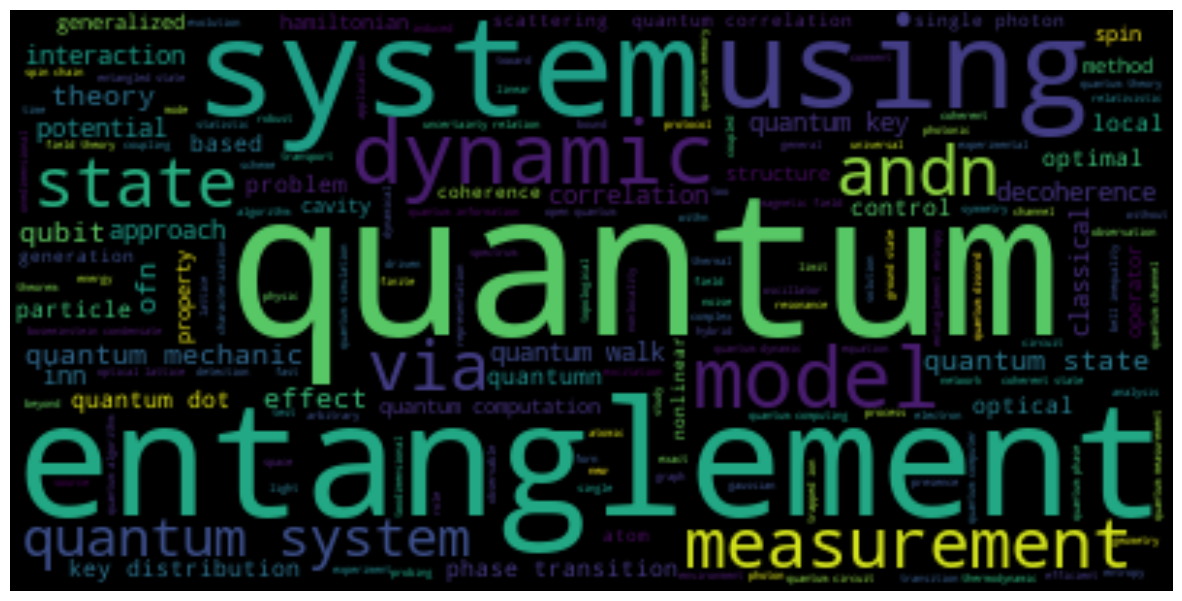

In [96]:
df.head(5)
words = clean(''.join(str(df['Title'].tolist())))
wc = WordCloud()
img = wc.generate_from_text(' '.join(words))
plt.figure( figsize=(15,10))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()


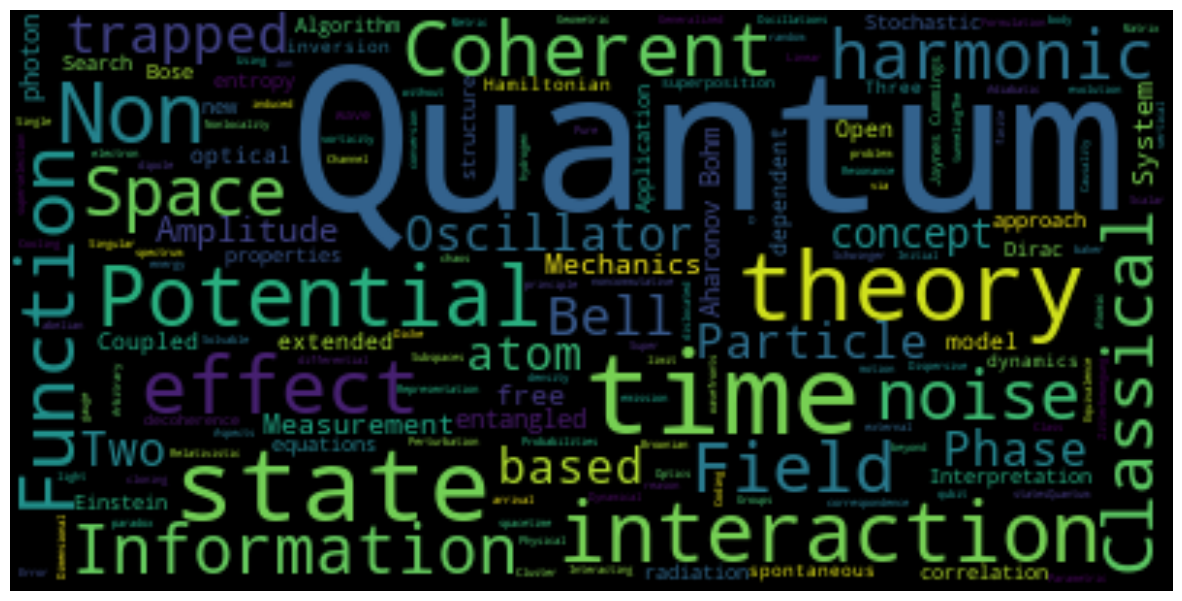

In [97]:
text = ''.join(i for i in df[df['Year']==1998].Title)
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()